## Regression
Dataset: pakwheels_used_cars.csv

## Data Cleaning and Preparation

### 1. Loading Data

In [1]:
import pandas as pd

# Load the regression dataset
cars_data = pd.read_csv('pakwheels_used_cars.csv')
print("PakWheels Used Cars Data:")
print(cars_data.head())


PakWheels Used Cars Data:
    ad_ref  assembly       body ad_city                color  engine_cc  \
0  7927285  Imported        Van  Lahore          Pearl White     2000.0   
1  7679303  Imported  Hatchback  Lahore                 Grey      996.0   
2  7915479       NaN      Sedan  Lahore          Super white     1798.0   
3  7918380       NaN      Sedan  Lahore  Crystal Black Pearl     1500.0   
4  7676167  Imported        MPV  Lahore               Silver     3000.0   

  fuel_type    make  mileage    model     registered transmission    year  \
0    Hybrid  Nissan   124000   Serena  Un-Registered    Automatic  1905.0   
1    Petrol  Toyota    30738     Vitz         Punjab    Automatic  1905.0   
2    Petrol  Toyota   183000  Corolla         Punjab    Automatic  1905.0   
3    Petrol   Honda    41000    Civic         Punjab    Automatic  1905.0   
4    Petrol  Toyota   126000  Alphard         Punjab    Automatic  1905.0   

       price  
0  8990000.0  
1  4190000.0  
2  3990000.0  


### 2. Handling Missing Values

In [5]:
# Check for missing values
print(cars_data.isnull().sum())

# Handle missing values - Fill with mode for simplicity
cars_data.fillna(cars_data.mode(), inplace=True)

ad_ref              0
assembly        53261
body             8865
ad_city             0
color            1510
engine_cc           2
fuel_type         934
make                0
mileage             0
model               0
registered          0
transmission        0
year             4721
price             649
dtype: int64


### 3. Data Transformation

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['ad_ref', 'assembly', 'body', 'make', 'model', 'transmission', 'fuel_type', 'color', 'registered']
for column in categorical_columns:
    le = LabelEncoder()
    cars_data[column] = le.fit_transform(cars_data[column])
    label_encoders[column] = le

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['engine_cc', 'mileage']
cars_data[numerical_features] = scaler.fit_transform(cars_data[numerical_features])


### 4. Data Splitting

In [8]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_cars = cars_data.drop('price', axis=1)
y_cars = cars_data['price']
X_train_cars, X_test_cars, y_train_cars, y_test_cars = train_test_split(X_cars, y_cars, test_size=0.2, random_state=42)


## Data Analysis and Visualization

## 1. Exploratory Data Analysis (EDA)

In [11]:
print(cars_data.describe())


             ad_ref      assembly          body         color     engine_cc  \
count  77237.000000  77237.000000  77237.000000  77237.000000  7.723500e+04   
mean   38618.000000      0.689579     12.782993    247.125121  4.747071e-17   
std    22296.545708      0.462669      5.307183    124.722764  1.000006e+00   
min        0.000000      0.000000      0.000000      0.000000 -1.983228e+00   
25%    19309.000000      0.000000      7.000000    155.000000 -5.743602e-01   
50%    38618.000000      1.000000     16.000000    303.000000 -1.504281e-01   
75%    57927.000000      1.000000     16.000000    360.000000  2.735039e-01   
max    77236.000000      1.000000     21.000000    386.000000  1.920914e+01   

          fuel_type          make       mileage         model    registered  \
count  77237.000000  77237.000000  7.723700e+04  77237.000000  77237.000000   
mean       1.886259     49.088054 -7.138822e-17    181.764349     75.627199   
std        0.462787     17.445702  1.000006e+00    

C:\Users\hp\anaconda33\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


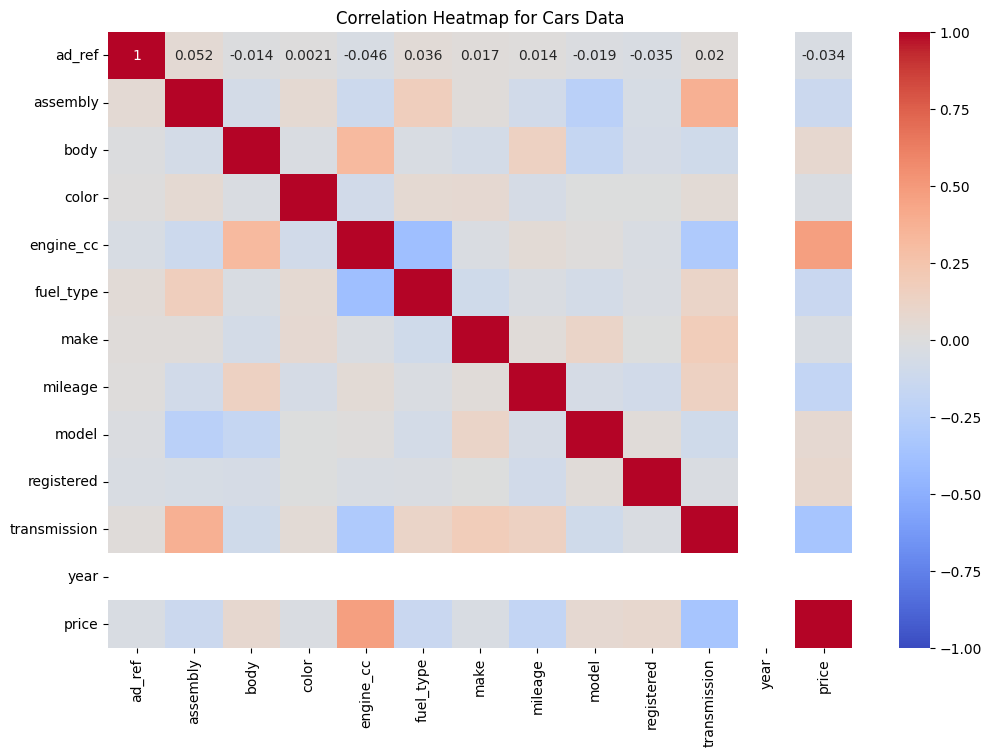

In [12]:

# Select only numeric columns
numeric_data = cars_data.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Cars Data')
plt.show()


### 2. Visualization

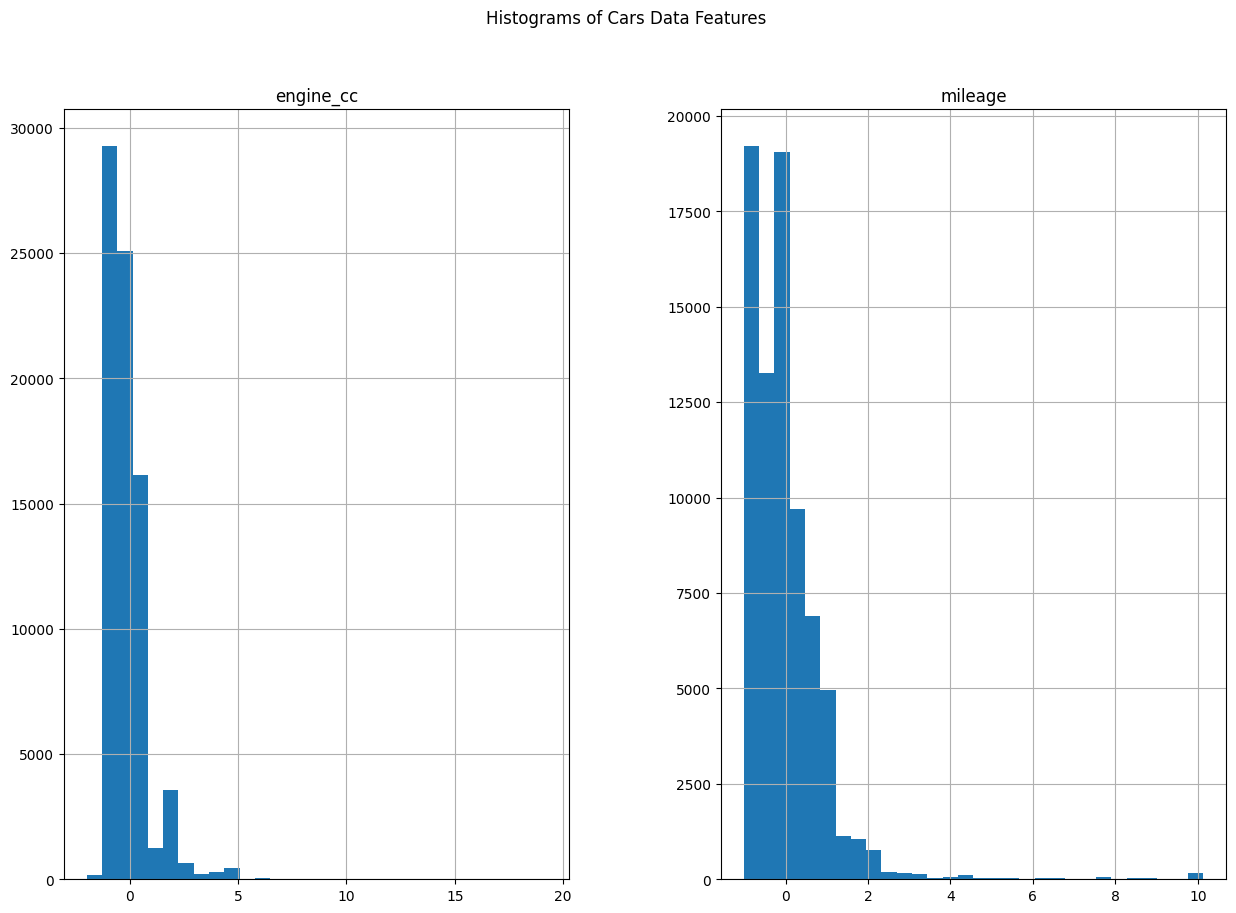

In [14]:
# Histograms
cars_data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Cars Data Features')
plt.show()


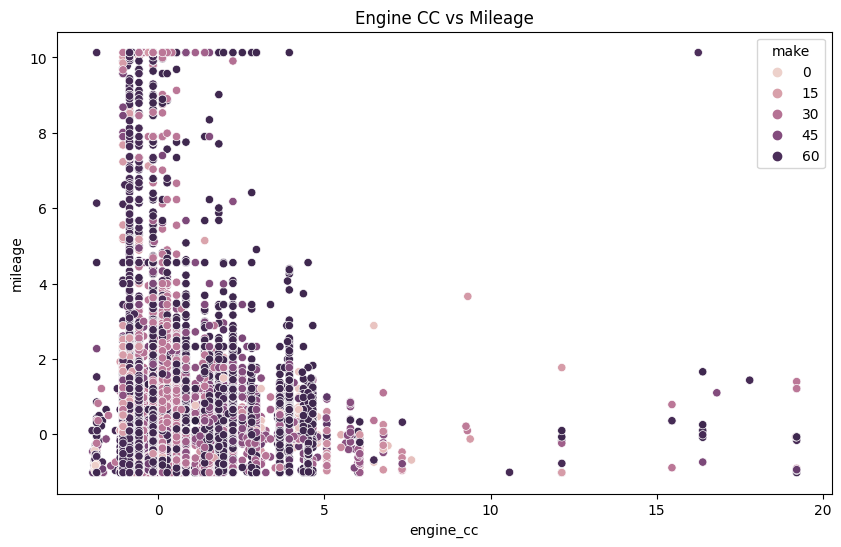

In [15]:

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_cc', y='mileage', data=cars_data, hue='make')
plt.title('Engine CC vs Mileage')
plt.show()


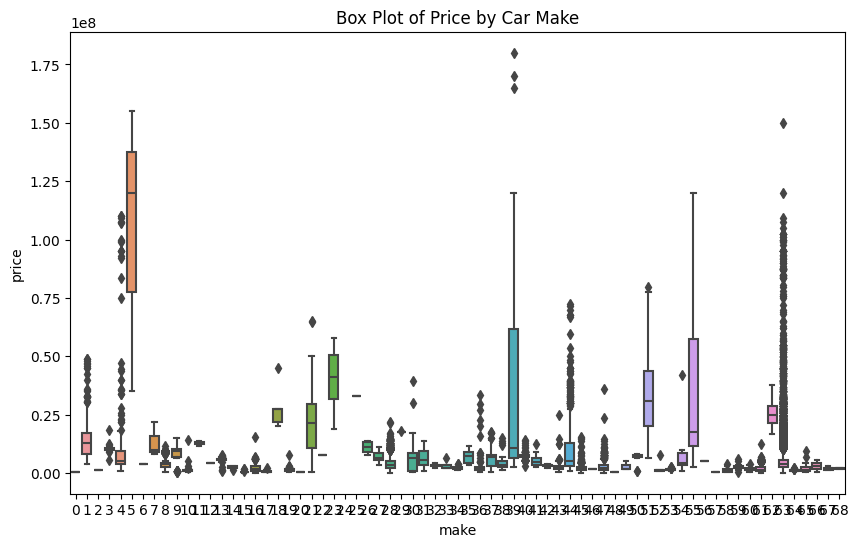

In [16]:

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='price', data=cars_data)
plt.title('Box Plot of Price by Car Make')
plt.show()
